Import the required packages

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

Image URL $\rightarrow$ https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

Download the image and save it as `lena.png` in your working directory

### ###Helper functions

Convert the image into gray scale and obtain the matrix of pixel values

In [2]:
def convert_image_matrix(img_name):
    src = cv2.imread(img_name)
    img = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    name, ext = img_name.split('.')
    plt.imsave(str(name + '_gray.' + ext), img, cmap='gray')
    
    gray_img = cv2.imread(str(name + '_gray.' + ext), 0)
    gimg_shape = gray_img.shape
    gimg_mat = []
    for i in range(0, gimg_shape[0]):
        row = []
        for j in range(0, gimg_shape[1]):
            pixel = gray_img.item(i, j)
            row.append(pixel)
        gimg_mat.append(row)
    gimg_mat = np.array(gimg_mat)
    
    return gimg_mat

Get submatrices of size `kernel.shape` by padding the image matrix by `0` for data loss prevention

In [3]:
def get_sub_matrices(orig_matrix, kernel_size):
    width = len(orig_matrix[0])
    height = len(orig_matrix)
    
    if kernel_size[0] == kernel_size[1]:
        if kernel_size[0] > 2:
            orig_matrix = np.pad(orig_matrix, kernel_size[0] - 2, mode='constant')
        else:
            pass
    else:
        pass
    
    giant_matrix = []
    for i in range(0, height - kernel_size[1] + 1):
        for j in range(0, width - kernel_size[0] + 1):
            giant_matrix.append(
                [
                    [orig_matrix[col][row] for row in range(j, j + kernel_size[0])]
                    for col in range(i, i + kernel_size[1])
                ]
            )
    img_sampling = np.array(giant_matrix)
    
    return img_sampling

Transform the image matrix by multiplying the submatrices with the kernel and summing up the result

In [4]:
def get_transformed_matrix(matrix_sampling, kernel_filter):
    transform_mat = []
    for each_mat in matrix_sampling:
        transform_mat.append(
            np.sum(np.multiply(each_mat, kernel_filter))
        )
    reshape_val = int(math.sqrt(matrix_sampling.shape[0]))
    transform_mat = np.array(transform_mat).reshape(reshape_val, reshape_val)
    
    return transform_mat

Function to plot original image vs convoluted image

In [5]:
def original_VS_convoluted(img_name, kernel_name, convoluted_matrix):
    name, ext = img_name.split('.')
    cv2.imwrite(str(name + '_' + kernel_name + '.' + ext), convoluted_matrix)
    
    orig = cv2.imread(str(name + '_gray.' + ext))
    conv = cv2.imread(str(name + '_' + kernel_name + '.' + ext))
    
    fig = plt.figure(figsize=(16, 25))
    
    ax1 = fig.add_subplot(2,2,1)
    ax1.axis("off")
    ax1.title.set_text('Original')
    ax1.imshow(orig)

    ax2 = fig.add_subplot(2,2,2)
    ax2.axis("off")
    ax2.title.set_text(str(kernel_name).title())
    ax2.imshow(conv)
    
    return True

Kernel Image Processing $\rightarrow$ https://en.wikipedia.org/wiki/Kernel_(image_processing)

**Convolution**: Mathematical operation on two functions that produces a third function expressing how the shape of one is modified by the other.

Kernel, Convolution matrix, mask is a small matrix used for blurring, sharpening, embossing, edge detection and more. This is done by doing a convolution between a kernel and an image.

* **Identity**: It is a function that always returns the same value that was used as its argument.
$$f(x) = x$$

Original image matrix: 

[[142 149 145 ...  94  94  94]
 [145 149 142 ...  97  97  97]
 [149 138 149 ...  97  94  94]
 ...
 [113 117 121 ...  32  32  32]
 [113 113 117 ...  28  28  32]
 [100 113 113 ...  28  32  36]]

##########################

Transformed image matrix: 

[[142 149 145 ...  94  94  94]
 [145 149 142 ...  97  97  97]
 [149 138 149 ...  88  97  97]
 ...
 [108 121 133 ...  32  32  32]
 [108 113 121 ...  32  32  32]
 [113 117 121 ...  32  32  32]]


True

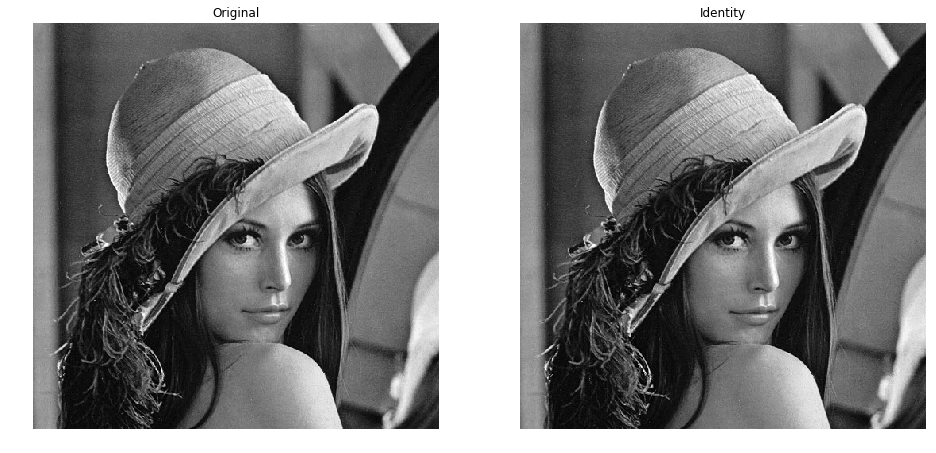

In [6]:
img_name = 'lena.png'
img_mat = convert_image_matrix(img_name=img_name)
identity_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
img_sampling = get_sub_matrices(orig_matrix=img_mat, kernel_size=identity_kernel.shape)
transform_mat = get_transformed_matrix(matrix_sampling=img_sampling, kernel_filter=identity_kernel)
print('Original image matrix: \n')
print(img_mat)
print('\n##########################\n')
print('Transformed image matrix: \n')
print(transform_mat)
original_VS_convoluted(img_name=img_name, kernel_name='identity', convoluted_matrix=transform_mat)

* **Edge detection**: Includes variety of mathematical methods that aim at identifying points in a digital image at which the image brightness changes.

Original image matrix: 

[[142 149 145 ...  94  94  94]
 [145 149 142 ...  97  97  97]
 [149 138 149 ...  97  94  94]
 ...
 [113 117 121 ...  32  32  32]
 [113 113 117 ...  28  28  32]
 [100 113 113 ...  28  32  36]]

##########################

Transformed image matrix: 

[[693 469 433 ... 273 273 273]
 [433  33 -26 ...  21  18  12]
 [469 -70  33 ... -66   9   3]
 ...
 [305  39  90 ...   8   4   0]
 [292 -38 -17 ...   0   0   0]
 [340  17   5 ...   4   4   8]]


True

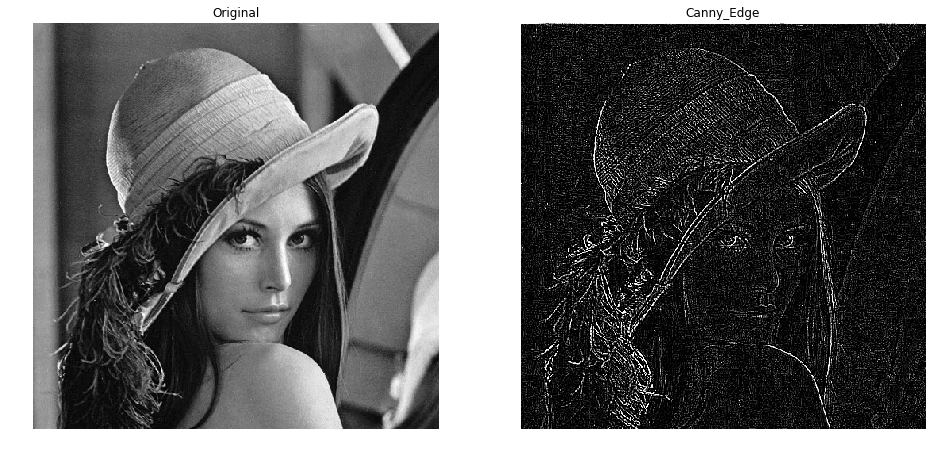

In [7]:
img_name = 'lena.png'
img_mat = convert_image_matrix(img_name=img_name)
identity_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
img_sampling = get_sub_matrices(orig_matrix=img_mat, kernel_size=identity_kernel.shape)
transform_mat = get_transformed_matrix(matrix_sampling=img_sampling, kernel_filter=identity_kernel)
print('Original image matrix: \n')
print(img_mat)
print('\n##########################\n')
print('Transformed image matrix: \n')
print(transform_mat)
original_VS_convoluted(img_name=img_name, kernel_name='canny_edge', convoluted_matrix=transform_mat)

* **Sharpen**:

Original image matrix: 

[[142 149 145 ...  94  94  94]
 [145 149 142 ...  97  97  97]
 [149 138 149 ...  97  94  94]
 ...
 [113 117 121 ...  32  32  32]
 [113 113 117 ...  28  28  32]
 [100 113 113 ...  28  32  36]]

##########################

Transformed image matrix: 

[[416 309 292 ... 185 185 185]
 [285 171 122 ... 109 100 100]
 [313 101 171 ...  55 106 100]
 ...
 [211 134 168 ...  36  32  32]
 [206  98 112 ...  32  32  32]
 [227 125 122 ...  32  32  36]]


True

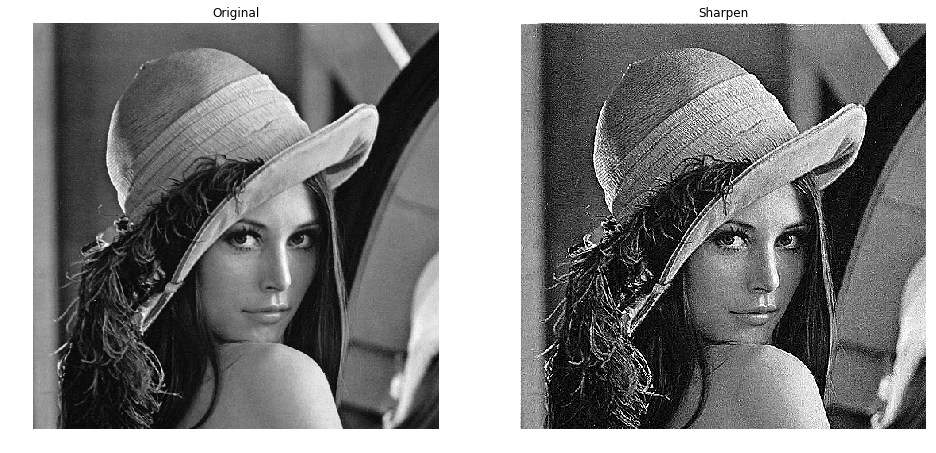

In [8]:
img_name = 'lena.png'
img_mat = convert_image_matrix(img_name=img_name)
identity_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
img_sampling = get_sub_matrices(orig_matrix=img_mat, kernel_size=identity_kernel.shape)
transform_mat = get_transformed_matrix(matrix_sampling=img_sampling, kernel_filter=identity_kernel)
print('Original image matrix: \n')
print(img_mat)
print('\n##########################\n')
print('Transformed image matrix: \n')
print(transform_mat)
original_VS_convoluted(img_name=img_name, kernel_name='sharpen', convoluted_matrix=transform_mat)

* **Box blur**: Spatial domain linear filter in which each pixel in the resulting image has a value equal to the average value of its neighboring pixels in the input image.

Original image matrix: 

[[142 149 145 ...  94  94  94]
 [145 149 142 ...  97  97  97]
 [149 138 149 ...  97  94  94]
 ...
 [113 117 121 ...  32  32  32]
 [113 113 117 ...  28  28  32]
 [100 113 113 ...  28  32  36]]

##########################

Transformed image matrix: 

[[ 65.          96.88888889  96.88888889 ...  63.66666667  63.66666667
   63.66666667]
 [ 96.88888889 145.33333333 144.88888889 ...  94.66666667  95.
   95.66666667]
 [ 96.88888889 145.77777778 145.33333333 ...  95.33333333  96.
   96.66666667]
 ...
 [ 74.11111111 116.66666667 123.         ...  31.11111111  31.55555556
   32.        ]
 [ 75.55555556 117.22222222 122.88888889 ...  32.          32.
   32.        ]
 [ 75.22222222 115.11111111 120.44444444 ...  31.55555556  31.55555556
   31.11111111]]


True

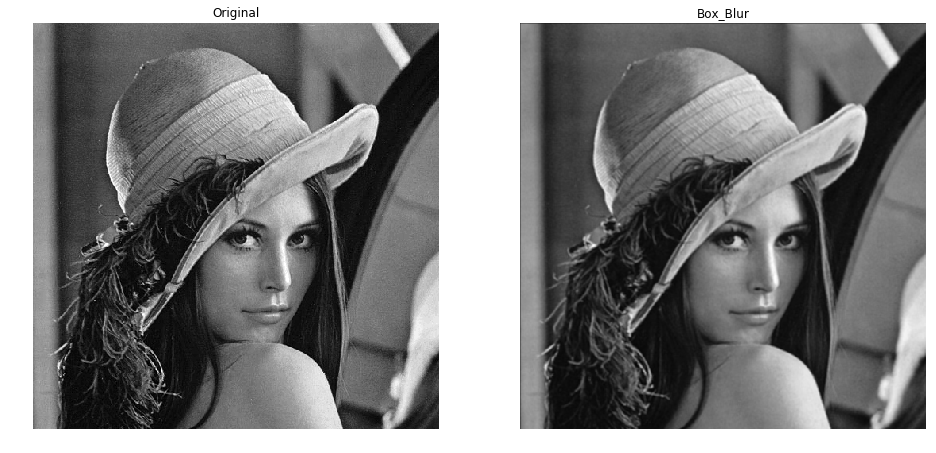

In [9]:
img_name = 'lena.png'
img_mat = convert_image_matrix(img_name=img_name)
identity_kernel = np.multiply(1/9, np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]))
img_sampling = get_sub_matrices(orig_matrix=img_mat, kernel_size=identity_kernel.shape)
transform_mat = get_transformed_matrix(matrix_sampling=img_sampling, kernel_filter=identity_kernel)
print('Original image matrix: \n')
print(img_mat)
print('\n##########################\n')
print('Transformed image matrix: \n')
print(transform_mat)
original_VS_convoluted(img_name=img_name, kernel_name='box_blur', convoluted_matrix=transform_mat)

* **Gaussian blur(3 x 3)**: Also known as gaussian smoothing is the result of gaussian function, typically to reduce the image noise.

Original image matrix: 

[[142 149 145 ...  94  94  94]
 [145 149 142 ...  97  97  97]
 [149 138 149 ...  97  94  94]
 ...
 [113 117 121 ...  32  32  32]
 [113 113 117 ...  28  28  32]
 [100 113 113 ...  28  32  36]]

##########################

Transformed image matrix: 

[[ 81.5625 109.6875 108.75   ...  71.25    71.25    71.25  ]
 [109.1875 145.5625 144.875  ...  94.9375  95.6875  96.0625]
 [109.4375 144.6875 145.5625 ...  94.1875  95.875   96.625 ]
 ...
 [ 82.5    117.75   125.1875 ...  31.25    31.75    32.    ]
 [ 83.625  116.3125 122.625  ...  32.      32.      32.    ]
 [ 84.625  115.4375 120.625  ...  31.75    31.75    31.25  ]]


True

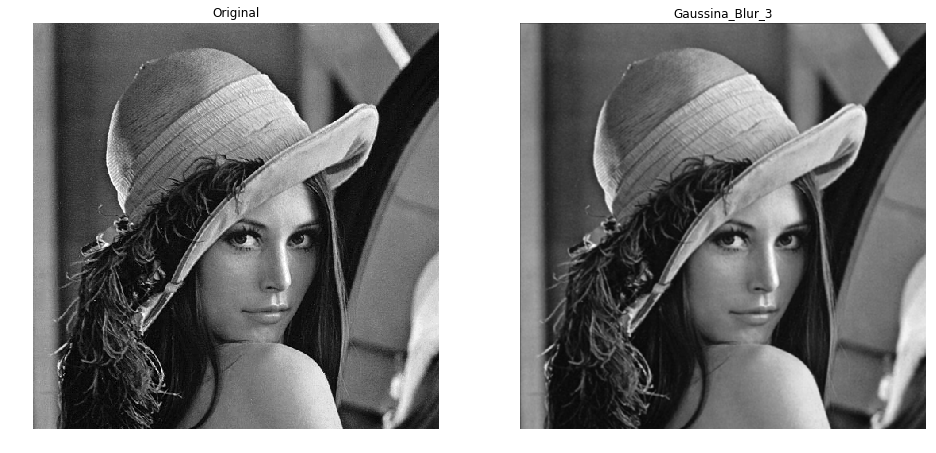

In [10]:
img_name = 'lena.png'
img_mat = convert_image_matrix(img_name=img_name)
identity_kernel = np.multiply(1/16, np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]))
img_sampling = get_sub_matrices(orig_matrix=img_mat, kernel_size=identity_kernel.shape)
transform_mat = get_transformed_matrix(matrix_sampling=img_sampling, kernel_filter=identity_kernel)
print('Original image matrix: \n')
print(img_mat)
print('\n##########################\n')
print('Transformed image matrix: \n')
print(transform_mat)
original_VS_convoluted(img_name=img_name, kernel_name='gaussina_blur_3', convoluted_matrix=transform_mat)

* **Gaussian blur (5 x 5)**: 

Original image matrix: 

[[142 149 145 ...  94  94  94]
 [145 149 142 ...  97  97  97]
 [149 138 149 ...  97  94  94]
 ...
 [113 117 121 ...  32  32  32]
 [113 113 117 ...  28  28  32]
 [100 113 113 ...  28  32  36]]

##########################

Transformed image matrix: 

[[ 14.05078125  31.171875    42.66796875 ...  29.54296875  29.55078125
   29.5625    ]
 [ 31.0625      68.69140625  93.81640625 ...  65.40625     65.4296875
   65.33203125]
 [ 42.640625    93.79296875 127.77734375 ...  89.58203125  89.59765625
   89.13671875]
 ...
 [ 34.265625    77.68359375 111.046875   ...  29.0625      27.96875
   28.84375   ]
 [ 34.25        77.73046875 111.03515625 ...  28.328125    27.875
   28.921875  ]
 [ 33.921875    77.35546875 110.84765625 ...  28.25        28.546875
   29.515625  ]]


True

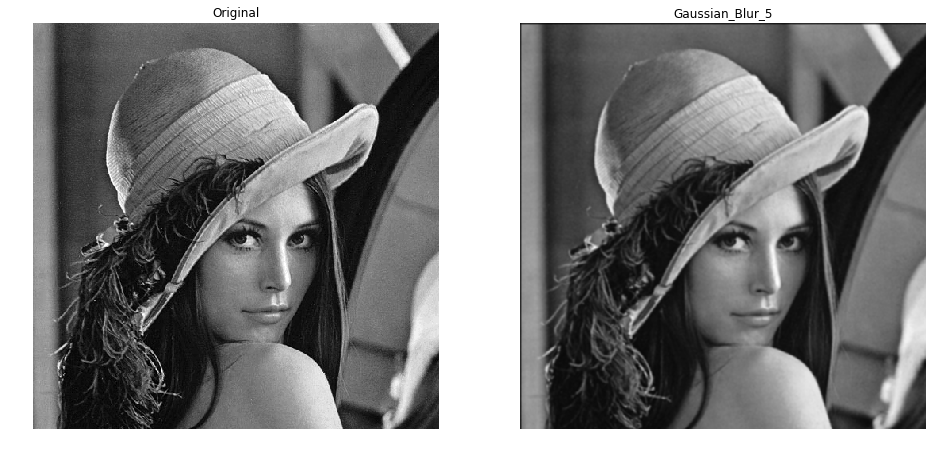

In [11]:
img_name = 'lena.png'
img_mat = convert_image_matrix(img_name=img_name)
identity_kernel = np.multiply(1/256, np.array([[1, 4, 6, 4, 1],
                                               [4, 16, 24, 16, 4],
                                               [6, 24, 36, 24, 6],
                                               [4, 16, 24, 16, 4],
                                               [1, 4, 6, 4, 1]]))
img_sampling = get_sub_matrices(orig_matrix=img_mat, kernel_size=identity_kernel.shape)
transform_mat = get_transformed_matrix(matrix_sampling=img_sampling, kernel_filter=identity_kernel)
print('Original image matrix: \n')
print(img_mat)
print('\n##########################\n')
print('Transformed image matrix: \n')
print(transform_mat)
original_VS_convoluted(img_name=img_name, kernel_name='gaussian_blur_5', convoluted_matrix=transform_mat)

* **Unsharp masking**: An image sharpening technique that uses `blurred` or `unsharp` negative image to create the of the original image.

Original image matrix: 

[[142 149 145 ...  94  94  94]
 [145 149 142 ...  97  97  97]
 [149 138 149 ...  97  94  94]
 ...
 [113 117 121 ...  32  32  32]
 [113 113 117 ...  28  28  32]
 [100 113 113 ...  28  32  36]]

##########################

Transformed image matrix: 

[[-14.05078125 -31.171875   -42.66796875 ... -29.54296875 -29.55078125
  -29.5625    ]
 [-31.0625     215.30859375 204.18359375 ... 122.59375    122.5703125
  122.66796875]
 [-42.640625   196.20703125 170.22265625 ... 104.41796875 104.40234375
  104.86328125]
 ...
 [-34.265625   138.31640625 122.953125   ...  26.9375      14.03125
   27.15625   ]
 [-34.25       148.26953125 122.96484375 ...  31.671875    22.125
   35.078125  ]
 [-33.921875   122.64453125 123.15234375 ...  27.75        27.453125
   26.484375  ]]


True

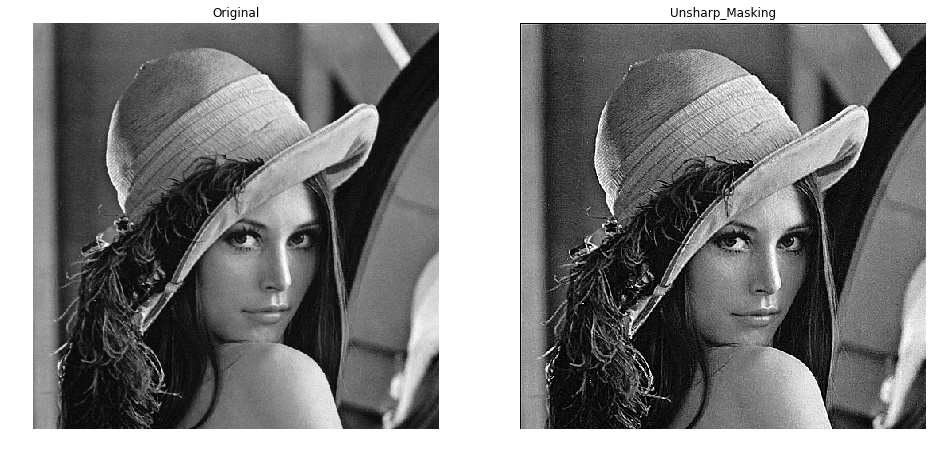

In [12]:
img_name = 'lena.png'
img_mat = convert_image_matrix(img_name=img_name)
identity_kernel = np.multiply(-1/256, np.array([[1, 4, 6, 4, 1],
                                               [4, 16, 24, 16, 4],
                                               [6, 24, -476, 24, 6],
                                               [4, 16, 24, 16, 4],
                                               [1, 4, 6, 4, 1]]))
img_sampling = get_sub_matrices(orig_matrix=img_mat, kernel_size=identity_kernel.shape)
transform_mat = get_transformed_matrix(matrix_sampling=img_sampling, kernel_filter=identity_kernel)
print('Original image matrix: \n')
print(img_mat)
print('\n##########################\n')
print('Transformed image matrix: \n')
print(transform_mat)
original_VS_convoluted(img_name=img_name, kernel_name='unsharp_masking', convoluted_matrix=transform_mat)

* **Custom conv**: 

Original image matrix: 

[[142 149 145 ...  94  94  94]
 [145 149 142 ...  97  97  97]
 [149 138 149 ...  97  94  94]
 ...
 [113 117 121 ...  32  32  32]
 [113 113 117 ...  28  28  32]
 [100 113 113 ...  28  32  36]]

##########################

Transformed image matrix: 

[[131.9        237.01666667 232.31666667 ... 155.15       155.15
  155.15      ]
 [203.6        310.56666667 323.11666667 ... 194.66666667 207.56666667
  208.51666667]
 [215.08333333 313.78333333 313.83333333 ... 206.66666667 205.06666667
  212.31666667]
 ...
 [130.95       223.01666667 267.36666667 ...  65.          69.
   69.33333333]
 [150.05       239.38333333 262.95       ...  69.33333333  69.33333333
   69.33333333]
 [152.21666667 235.15       244.71666667 ...  68.93333333  69.4
   63.4       ]]


True

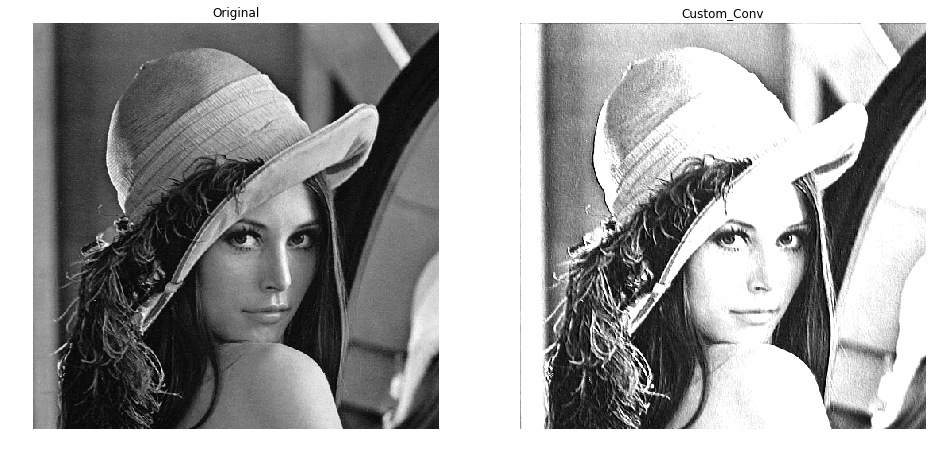

In [13]:
img_name = 'lena.png'
img_mat = convert_image_matrix(img_name=img_name)
identity_kernel = np.multiply(0.5/30, np.array([[5, 60, -31], [34, 10, -43], [6, 90, -1]]))
img_sampling = get_sub_matrices(orig_matrix=img_mat, kernel_size=identity_kernel.shape)
transform_mat = get_transformed_matrix(matrix_sampling=img_sampling, kernel_filter=identity_kernel)
print('Original image matrix: \n')
print(img_mat)
print('\n##########################\n')
print('Transformed image matrix: \n')
print(transform_mat)
original_VS_convoluted(img_name=img_name, kernel_name='custom_conv', convoluted_matrix=transform_mat)